# Q1 



# Answer1


1. The prog_score function calculates and classifies a patient's risk level based on three input parameters: biomarker_A, stage, and age.

2. It begins by validating the input values:
   - biomarker_A must be between 0.5 and 11.2.
   - stage must be one of 'I', 'II', 'III', or 'IV'.
   - age must be between 25 and 75.
   
3. If any input is invalid, a ValueError is raised with a specific error message.

4. The function defines an inner function score_cal to calculate the patient's score:
   - The score is calculated by dividing biomarker_A by age.
   - Based on the stage, the score is adjusted:
     - For stage 'I' or 'II', 1 is added to the score.
     - For stage 'III' or 'IV', 10 is added to the score.

5. After calculating the score, the function classifies the patient into "High risk" or "Low risk":
   - If the score is greater than 6.185, the patient is classified as high risk.
   - Otherwise, the patient is classified as low risk.

6. The function handles multiple exceptions:
   - ValueError for invalid input values.
   - ZeroDivisionError if age is zero (although not likely given input constraints).
   - A general exception handler for unexpected errors.

7. If any error occurs, an appropriate error message is returned, indicating the issue.

In [2]:
def prog_score(biomarker_A, stage, age): 
    """
    Calculates a cancer prognostic score using three parameters, with input validation 
    and exception handling to stratify patients into high or low risk groups.
    
    Args:
        biomarker_A (float): Value of biomarker A (range 0.5 to 11.2).
        stage (str): Cancer stage ("I", "II", "III", or "IV").
        age (int/float): Age of the patient (range 25 to 75).
        
    Returns:
        str: Risk group ('High risk' or 'Low risk') and the score, or error message for invalid input.
    """
    # Validation of input types and values
    try:
        # Check that biomarker_A and age are numbers
        if not (isinstance(biomarker_A, (int, float))):
            raise TypeError("Biomarker A must be a number.")
        if not (isinstance(age, (int, float))):
            raise TypeError("Age must be a number.")
        # Check value ranges
        if not (0.5 <= biomarker_A <= 11.2):
            raise ValueError("Biomarker A value must be between 0.5 and 11.2.")
        if stage not in ['I', 'II', 'III', 'IV']:
            raise ValueError("Stage must be one of 'I', 'II', 'III', or 'IV'.")
        if not (25 <= age <= 75):
            raise ValueError("Age must be between 25 and 75.")
        if age == 0:
            raise ZeroDivisionError("Age cannot be zero.")

        # Inner function for score calculation
        def score_cal(biomarker_A, stage, age):    
            score = biomarker_A / age
            if stage in ["I", "II"]:
                score += 1
            else:  # For "III", "IV"
                score += 10
            return score

        patient_score = score_cal(biomarker_A, stage, age)

        # Sorting into risk groups
        if patient_score > 6.185:
            return f"High risk (Score: {patient_score:.3f})"
        else:
            return f"Low risk (Score: {patient_score:.3f})"
    
    # Error handling
    except TypeError as te:
        return f"Input Error: {te}"
    except ValueError as ve:      
        return f"Input Error: {ve}"
    except ZeroDivisionError as zde:
        return f"Calculation Error: {zde}"
    except Exception as e:
        return f"Unexpected Error: {e}"

# Example call
print(prog_score(8, "I", 40))
print(prog_score("8", "I", 40))  # Should trigger type error
print(prog_score(8, "V", 40))    # Should trigger stage error
print(prog_score(8, "I", "twenty"))  # Should trigger type error


Low risk (Score: 1.200)
Input Error: Biomarker A must be a number.
Input Error: Stage must be one of 'I', 'II', 'III', or 'IV'.
Input Error: Age must be a number.


# Q2 


# Answer2

1. The script loads a DNA sequence from a FASTA file given by user, ignoring the header and combining the sequence lines into one string.
2. It counts the restriction sites for the enzymes EcoRI and HindIII by searching for their recognition sequences in the DNA.
3. After counting the sites, the script identifies which enzyme cuts more frequently.
4. Based on the enzyme with the highest count, it counts additional restriction sites for other enzymes: BamHI and XhoI for EcoRI, and PstI and NotI for HindIII.
5. The script simulates digestion by determining where the enzymes cut the DNA sequence, producing fragments of varying sizes.
6. Fragment sizes are filtered to include only those less than or equal to 2000 base pairs.
7. A histogram is generated to display the distribution of these fragment sizes.
8. The user is prompted to input the file path for the FASTA file.
9. Results are output through printed statements showing enzyme counts and a histogram visualization of fragment sizes.

Enter the path to your FASTA file:  chr21.fasta


EcoRI sites: 5587
HindIII sites: 6276
The enzyme that cuts more often is: HindIII
PstI sites: 9914
NotI sites: 138


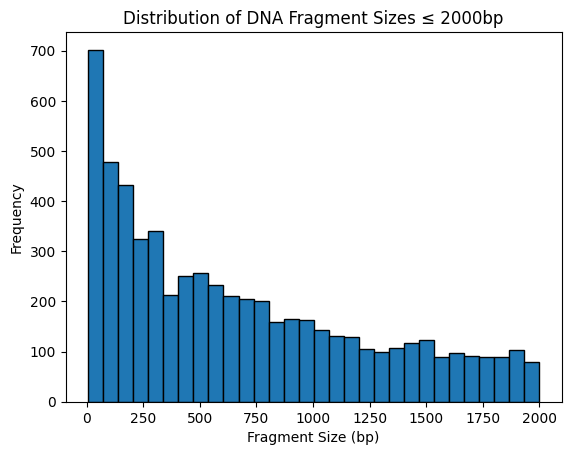

In [5]:
import re
import matplotlib.pyplot as plt

# Function to load DNA sequence from a FASTA file
def fasta_file(path_file):
    try:
        with open(path_file, 'r') as file:
            lines = file.readlines()
        # Ignoring the header (first line) and joining the rest to form the sequence
        return ''.join(line.strip() for line in lines[1:])  # Excluding the header (line 0)
    except FileNotFoundError:
        print(f"Error: The file {path_file} was not found.")
        return None

# Function to count restriction sites for specific enzymes
def site_count(sequence, enzyme_sites):
    enzyme_counts = {}
    for enzyme, site in enzyme_sites.items():
        enzyme_counts[enzyme] = len(re.findall(site, sequence))
    return enzyme_counts

# Function to determine which enzyme has the most restriction sites
def determine_highest_enzyme(enzyme_counts):
    if enzyme_counts['EcoRI'] > enzyme_counts['HindIII']:
        return 'EcoRI'
    else:
        return 'HindIII'

# Function to count additional restriction sites based on the enzyme with the highest count
def count_additional_sites(sequence, highest_enzyme):
    if highest_enzyme == 'EcoRI':
        additional_enzymes = {'BamHI': 'GGATCC', 'XhoI': 'CTCGAG'}
    else:
        additional_enzymes = {'PstI': 'CTGCAG', 'NotI': 'GCGGCCGC'}
    
    return site_count(sequence, additional_enzymes)

# Updated simulate digestion function
def simulate_digestion(sequence, enzymes):
    cut_positions = []
    for enzyme, site in enzymes.items():
        cut_positions += [m.start() for m in re.finditer(site, sequence)]
    cut_positions = sorted(set(cut_positions))  # Sort and remove duplicates
    
    fragments = []
    previous_cut = 0
    for cut in cut_positions:
        fragments.append(cut - previous_cut)
        previous_cut = cut
    fragments.append(len(sequence) - previous_cut)
    
    return fragments

# Function to plot histogram of fragment sizes <= 2000bp
def plot_histogram(fragment_sizes):
    filtered_sizes = [size for size in fragment_sizes if size <= 2000]
    if not filtered_sizes:
        print("No fragment sizes ≤ 2000 bp to plot.")
        return
    
    # Plotting the histogram
    plt.hist(filtered_sizes, bins=30, edgecolor='black')
    plt.xlabel('Fragment Size (bp)')
    plt.ylabel('Frequency')
    plt.title('Distribution of DNA Fragment Sizes ≤ 2000bp')
    plt.show()

# Main analysis function
def analyze_sequence(sequence):
    # Restriction sites for EcoRI and HindIII
    enzyme_sites = {
        'EcoRI': 'GAATTC',
        'HindIII': 'AAGCTT'
    }
    
    # Counting initial restriction sites
    enzyme_counts = site_count(sequence, enzyme_sites)
    
    print(f"EcoRI sites: {enzyme_counts['EcoRI']}")
    print(f"HindIII sites: {enzyme_counts['HindIII']}")
    
    # Determining which enzyme cuts more often
    highest_enzyme = determine_highest_enzyme(enzyme_counts)
    print(f"The enzyme that cuts more often is: {highest_enzyme}")
    
    # Counting additional restriction sites for the chosen enzyme
    additional_sites = count_additional_sites(sequence, highest_enzyme)
    if highest_enzyme == 'EcoRI':
        print(f"BamHI sites: {additional_sites['BamHI']}")
        print(f"XhoI sites: {additional_sites['XhoI']}")
    else:
        print(f"PstI sites: {additional_sites['PstI']}")
        print(f"NotI sites: {additional_sites['NotI']}")
    
    # Define enzymes to use based on the highest enzyme
    enzymes_to_use = {}
    if highest_enzyme == 'EcoRI':
        enzymes_to_use = {'BamHI': 'GGATCC', 'XhoI': 'CTCGAG'}
    else:
        enzymes_to_use = {'PstI': 'CTGCAG', 'NotI': 'GCGGCCGC'}
    
    # Simulating digestion
    fragment_sizes = simulate_digestion(sequence, enzymes_to_use)
    
    # Plot histogram of fragment sizes
    plot_histogram(fragment_sizes)

# Main program: Taking file path as input from the user
def main():
    path_file = input("Enter the path to your FASTA file: ").strip()
    
    # Loading the DNA sequence from the provided FASTA file
    sequence = fasta_file(path_file)
    
    if sequence:
        # Analyzing the loaded DNA sequence
        analyze_sequence(sequence)

if __name__ == "__main__":
    main()



# Q3

# Answer3

This Python script is designed to clean, process, and analyze clinical and protein data from two separate CSV files. It integrates various functionalities such as data merging, summary generation, plotting, missing value handling, and exporting cleaned data. Here's a step-by-step breakdown of how the script works:

1. **Loading the Data**: 
   The script loads clinical and protein data from two CSV files using the pandas library. These files are assumed to contain a common column (tissue_source_site), which is used for merging the datasets into a single dataframe.

2. **Merging the Data**: 
   The clinical and protein data are merged using an inner join on the tissue_source_site column, ensuring that only rows with matching entries in both datasets are kept.

3. **Exporting Data**: 
   After the data is processed, the export_data() function prompts the user to select a file format (csv or txt) for saving the merged data. Based on the user's input, the data is saved in the chosen format.

4. **Summary of Selected Attributes**: 
   The attribute_summary() function allows the user to select at least two attributes (columns) from the merged dataset. It then generates and prints summary statistics (such as count, mean, standard deviation, etc.) for the selected attributes.

5. **Plotting Data**: 
   The create_plot() function allows the user to choose two attributes for creating a scatter plot. It generates a scatter plot using matplotlib, displaying the relationship between the two selected attributes. The user is prompted to input the attribute names, and the plot is displayed with labels and a legend.

6. **Missing Values Report**: 
   The missing_values_report() function provides an overview of missing values in the dataset. It calculates and prints the percentage of missing values by attribute and by patient. This helps to identify columns or patients with substantial missing data.

7. **Handling Missing Data**: 
   The remove_missing_data() function allows the user to define a threshold for how many missing values are acceptable for each patient. Patients who exceed the tolerance for missing values are removed from the dataset, and the number of removed patients is displayed. This step helps to clean the data by excluding samples with excessive missing information.

8. **Re-exporting Cleaned Data**: 
   After removing samples with excessive missing values, the script re-exports the cleaned dataset in the chosen file format.

Overall, this script offers an approach to handle clinical and protein data by providing functionalities for data cleaning, analysis, visualization, and export. It allows users to efficiently manage missing data, generate summaries, and explore relationships between different attributes in the dataset.

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 40.9 MB/s eta 0:00:00 0:00:01
Merged data shape: (724, 277)


Enter export format (csv/txt):  csv


Exported to merged_data.csv
Available columns: ['patient_barcode', 'tissue_source_site_x', 'patient_id_x', 'case_id', 'days_to_birth', 'days_to_death', 'ethnicity', 'gender', 'race', 'vital_status', 'year_of_birth', 'year_of_death', 'age_at_diagnosis', 'ajcc_pathologic_m', 'ajcc_pathologic_n', 'ajcc_pathologic_stage', 'ajcc_pathologic_t', 'ajcc_staging_system_edition', 'days_to_diagnosis', 'days_to_last_follow_up', 'icd_10_code', 'last_known_disease_status', 'morphology', 'primary_diagnosis', 'prior_malignancy', 'prior_treatment', 'progression_or_recurrence', 'site_of_resection_or_biopsy', 'synchronous_malignancy', 'tissue_or_organ_of_origin', 'tumor_grade', 'year_of_diagnosis', 'treatment_or_therapy', 'treatment_type', 'Sample_ID', 'tissue_source_site_y', 'patient_id_y', 'Cancer_Type', 'Sample_Type', 'SetID', 'X1433EPSILON', 'X4EBP1', 'X4EBP1_pS65', 'X4EBP1_pT37T46', 'X53BP1', 'ACC_pS79', 'ACC1', 'AKT', 'AKT_pS473', 'AKT_pT308', 'AMPKALPHA', 'AMPKALPHA_pT172', 'AR', 'ASNS', 'ATM', 'BA

Enter at least two attributes separated by comma:  CIAP, MTOR


             CIAP        MTOR
count  724.000000  724.000000
mean    -0.002972   -0.050760
std      0.197227    0.271621
min     -0.468270   -1.557300
25%     -0.124060   -0.185040
50%     -0.030347   -0.043884
75%      0.099206    0.118390
max      0.819800    0.715900
Available columns: ['patient_barcode', 'tissue_source_site_x', 'patient_id_x', 'case_id', 'days_to_birth', 'days_to_death', 'ethnicity', 'gender', 'race', 'vital_status', 'year_of_birth', 'year_of_death', 'age_at_diagnosis', 'ajcc_pathologic_m', 'ajcc_pathologic_n', 'ajcc_pathologic_stage', 'ajcc_pathologic_t', 'ajcc_staging_system_edition', 'days_to_diagnosis', 'days_to_last_follow_up', 'icd_10_code', 'last_known_disease_status', 'morphology', 'primary_diagnosis', 'prior_malignancy', 'prior_treatment', 'progression_or_recurrence', 'site_of_resection_or_biopsy', 'synchronous_malignancy', 'tissue_or_organ_of_origin', 'tumor_grade', 'year_of_diagnosis', 'treatment_or_therapy', 'treatment_type', 'Sample_ID', 'tissue_source_

Enter two attributes for scatter plot separated by comma:  CIAP, MTOR


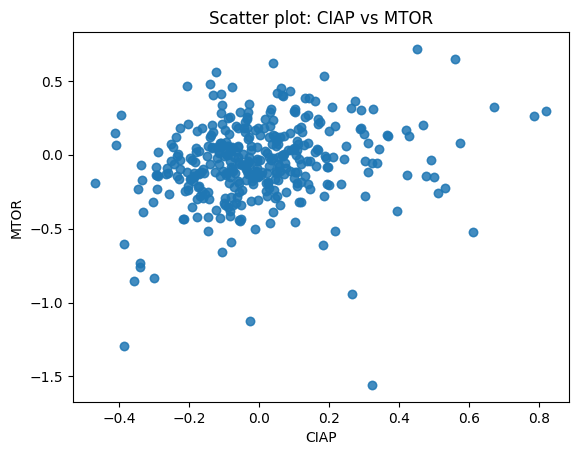

Missing values percentage per attribute:
patient_barcode          0.000000
tissue_source_site_x     0.000000
patient_id_x             0.000000
case_id                  0.000000
days_to_birth            5.801105
                          ...    
CK5                     35.359116
NAPSINA                 35.359116
P63                     35.359116
RET_pY905               35.359116
SYNAPTOPHYSIN           35.359116
Length: 277, dtype: float64
Missing values percentage per patient:
0      8.303249
1      8.303249
2      8.303249
3      8.303249
4      0.722022
         ...   
719    0.361011
720    0.361011
721    0.361011
722    0.722022
723    0.722022
Length: 724, dtype: float64


Enter maximum number or percentage (e.g. 10 or 10%) missing attributes allowed per patient:  10


Removed 256 samples with missing attributes exceeding threshold.


Enter export format (csv/txt):  csv


Exported to merged_data.csv


In [7]:

import pandas as pd
import matplotlib.pyplot as plt

def clean_and_process_data():
    clinical_file = "Q3_TCGA_LUAD_Clinical.csv"
    protein_file = "Q3_TCGA_LUAD_protein.csv"

    df_clinical = pd.read_csv(clinical_file)
    df_protein = pd.read_csv(protein_file)

    # Create patient_barcode in protein dataset by extracting from Sample_ID (take first 12 characters)
    # Usually patient barcode is first 12 chars of Sample_ID e.g. TCGA-2HA9GF
    df_protein['patient_barcode'] = df_protein['Sample_ID'].str[:12]

    # Merge on patient_barcode (common patients only)
    merged_df = pd.merge(df_clinical, df_protein, on='patient_barcode', how='inner')

    print(f"Merged data shape: {merged_df.shape}")

    def export_data(df):
        file_type = input("Enter export format (csv/txt): ").strip().lower()
        if file_type == 'csv':
            df.to_csv("merged_data.csv", index=False)
            print("Exported to merged_data.csv")
        elif file_type == 'txt':
            df.to_csv("merged_data.txt", sep='\t', index=False)
            print("Exported to merged_data.txt")
        else:
            print("Invalid format")

    def attribute_summary(df):
        print(f"Available columns: {list(df.columns)}")
        attrs = input("Enter at least two attributes separated by comma: ").split(',')
        attrs = [a.strip() for a in attrs]

        if len(attrs) < 2:
            print("Select at least two attributes.")
            return

        missing_attrs = [a for a in attrs if a not in df.columns]
        if missing_attrs:
            print(f"Attributes not found: {missing_attrs}")
            return

        summary = df[attrs].describe()
        print(summary)

    def scatter_plot(df):
        print(f"Available columns: {list(df.columns)}")
        attrs = input("Enter two attributes for scatter plot separated by comma: ").split(',')
        attrs = [a.strip() for a in attrs]

        if len(attrs) != 2:
            print("Select exactly two attributes.")
            return

        for a in attrs:
            if a not in df.columns:
                print(f"Attribute {a} not found.")
                return
            if not pd.api.types.is_numeric_dtype(df[a]):
                print(f"Attribute {a} is not numeric.")
                return

        plt.scatter(df[attrs[0]], df[attrs[1]], alpha=0.6)
        plt.xlabel(attrs[0])
        plt.ylabel(attrs[1])
        plt.title(f'Scatter plot: {attrs[0]} vs {attrs[1]}')
        plt.show()

    def missing_values_report(df):
        print("Missing values percentage per attribute:")
        print(df.isna().mean() * 100)
        print("Missing values percentage per patient:")
        print(df.isna().mean(axis=1) * 100)

    def remove_missing_data(df):
        thresh_input = input("Enter maximum number or percentage (e.g. 10 or 10%) missing attributes allowed per patient: ").strip()
        if thresh_input.endswith('%'):
            try:
                percent = float(thresh_input[:-1])
                max_missing = int(df.shape[1] * percent / 100)
            except ValueError:
                print("Invalid percentage.")
                return df
        else:
            try:
                max_missing = int(thresh_input)
            except ValueError:
                print("Invalid number.")
                return df

        patient_missing = df.isna().sum(axis=1)
        filtered_df = df[patient_missing <= max_missing]
        removed = df.shape[0] - filtered_df.shape[0]
        print(f"Removed {removed} samples with missing attributes exceeding threshold.")
        return filtered_df

    # Call workflow
    export_data(merged_df)
    attribute_summary(merged_df)
    scatter_plot(merged_df)
    missing_values_report(merged_df)
    filtered_df = remove_missing_data(merged_df)
    export_data(filtered_df)

clean_and_process_data()
